# Disambiguating Advection and KdV

Any single soliton travelling wave solution of the KdV equation (1) also solves the advection equation with $c$ depending on the speed of translation, which for KdV depends on the amplitude.  However, if two waves have different amplitudes and speeds, they may both solve the KdV equation but will not solve the same advection equation.

\begin{align}
u_t &+ 6uu_x + u_{xxx} = 0 \hspace{2cm} (1)\\
u_t &+ cu_x = 0\hspace{3.5cm} (2)
\end{align}

Here we show that looking at a single travelling wave solution, we recover the advection equation (at least for the two amplitudes shown), but when we look at both we get the KdV equation.  Observing that waves with different amplitudes travel at different rates indicates the need for nonlinearity in the evolution equation.

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import sys; sys.path.append('..')
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PDE_FIND import *

Populating the interactive namespace from numpy and matplotlib


# Generate a few solutions to each equation

For any $c$, the function below is a very simple closed form solution to the KdV and advection equations.  However, it always solves the KdV equation regardless of the choice of $c$ while solutions with different values of $c$ will each solve an advection equation but they won't be the same one.

In [2]:
# Soliton solution to KdV/advection equations
def soliton(x,t,c,a):
    return c/2*np.cosh(np.sqrt(c)/2*(x-c*t-a))**-2

In [3]:
c1 = 5.0
c2 = 1.0
n = 256
m = 50
x = linspace(-10, 12, n)
dt = 0.025
dx = x[1]-x[0]
t = linspace(dt,m*dt,m)

U1 = np.zeros((n,m))
U2 = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        U1[i,j] = soliton(x[i],t[j],c1,-3)
        U2[i,j] = soliton(x[i],t[j],c2,-1)

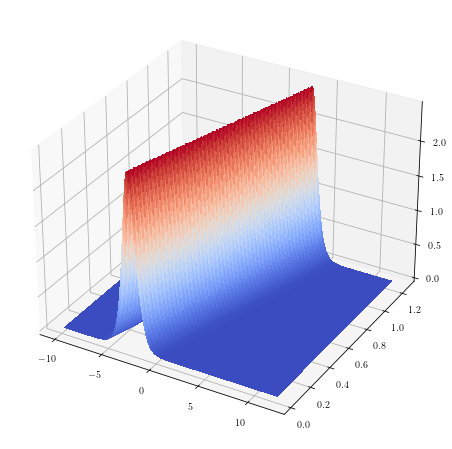

In [4]:
X, T = np.meshgrid(x, t)
fig1 = figure()
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X, T, U1.T, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

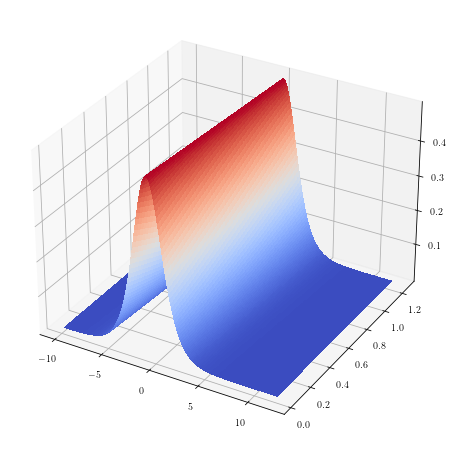

In [5]:
X, T = np.meshgrid(x, t)
fig1 = figure()
ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X, T, U2.T, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

## Look at the solutions individually

For each of the travelling waves, we get an advection equation.

In [6]:
# First look at the soliton with speed = 5
Ut1, R1, rhs_des1 = build_linear_system(U1, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
lam = 10**-5
d_tol = 5

w = TrainSTRidge(R1,Ut1,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
print_pde(w, rhs_des1)

..\PDE_FIND.py:443: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_best = np.linalg.lstsq(TrainR, TrainY)[0]
..\PDE_FIND.py:589: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if lam != 0: w = np.linalg.lstsq(X.T.dot(X) + lam*np.eye(d),X.T.dot(y))[0]
..\PDE_FIND.py:615: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old,

PDE derived using STRidge with L0 penalty
u_t = (-4.981273 +0.000000i)u_{x}
   


In [7]:
# Now with speed 1
Ut2, R2, _ = build_linear_system(U2, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')

w = TrainSTRidge(R2,Ut2,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
print_pde(w, rhs_des1)

PDE derived using STRidge with L0 penalty
u_t = (-1.000820 +0.000000i)u_{x}
   


## Both solutions $\rightarrow$ KdV

Taking the two linear systems and simply stacking them so that we're looking for a PDE that accuractely reflects the dynamics of each yields the KdV equation.

In [8]:
# Now look for a solution for both linear systems -> kdv
R = np.vstack([R1, R2])
Ut = np.vstack([Ut1,Ut2])

w = TrainSTRidge(R,Ut,lam,d_tol)
print("PDE derived using STRidge with L0 penalty")
print_pde(w, rhs_des1)

PDE derived using STRidge with L0 penalty
u_t = (-6.073982 +0.000000i)uu_{x}
    + (-1.039532 +0.000000i)u_{xxx}
   
